#### LIBRARIES

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

import warnings
warnings.filterwarnings("ignore", 
                        category = FutureWarning)
print("Libraries imported.")

Libraries imported.


#### READ AND EXPLORE DATA

In [2]:
data = pd.read_csv("train.csv")
data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [3]:
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


#### CARDINALITY CHECK

In [4]:
def check_unique_values(data):
    cardinal = pd.DataFrame({
        "column name": data.columns.tolist(),
        "data type": [data[c].dtype for c in data.columns],
        "unique values": [data[c].nunique() for c in data.columns],
        "values": [(data[c].unique()) for c in data.columns]
    })
    
    print("Cardinality Check Result:")
    display(cardinal)

check_unique_values(data)

Cardinality Check Result:


,column name,data type,unique values,values
0,id,int64,90615,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Sex,object,3,"[F, I, M]"
2,Length,float64,157,"[0.55, 0.63, 0.16, 0.595, 0.555, 0.61, 0.415, ..."
3,Diameter,float64,126,"[0.43, 0.49, 0.11, 0.475, 0.425, 0.48, 0.325, ..."
4,Height,float64,90,"[0.15, 0.145, 0.025, 0.13, 0.17, 0.11, 0.04, 0..."
5,Whole weight,float64,3175,"[0.7715, 1.13, 0.021, 0.9145, 0.782, 1.201, 0...."
6,Whole weight.1,float64,1799,"[0.3285, 0.458, 0.0055, 0.3755, 0.3695, 0.5335..."
7,Whole weight.2,float64,979,"[0.1465, 0.2765, 0.003, 0.2055, 0.16, 0.3135, ..."
8,Shell weight,float64,1129,"[0.24, 0.32, 0.005, 0.25, 0.1975, 0.3085, 0.13..."
9,Rings,int64,28,"[11, 6, 10, 9, 4, 8, 15, 7, 12, 20, 17, 13, 14..."


#### DROP IDENTIFIER

In [5]:
data = data.drop(columns = ["id"])
print("Identifier column dropped.")

Identifier column dropped.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.2+ MB


In [7]:
num = []
cat = ["Sex"]

for i in data.columns:
    if i not in cat:
        num.append(i)

print("Categorical columns:")
for i in cat:
    print(f"- {i}")
print("Numerical columns:")
for i in num:
    print(f"- {i}")

Categorical columns:
- Sex
Numerical columns:
- Length
- Diameter
- Height
- Whole weight
- Whole weight.1
- Whole weight.2
- Shell weight
- Rings


#### IDENTIFY INCONSISTENCIES

In [8]:
for c in cat:
    print(data[c].value_counts(), "\n")

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64 



#### DUPLICATED VALUES

In [9]:
print(f"There are {data.duplicated().sum()} duplicates.")

There are 0 duplicates.


#### MISSING VALUES

In [10]:
def check_missing(data):
    missing = pd.DataFrame({
        "column name" : data.columns.tolist(),
        "missing values": data.isnull().sum().tolist(),
        "percentage": ((data.isnull().sum()) * 100 / len(data)).round(2).tolist()
    })

    print("Missing Values Check Result:")
    display(missing)

check_missing(data)

Missing Values Check Result:


,column name,missing values,percentage
0,Sex,0,0.0
1,Length,0,0.0
2,Diameter,0,0.0
3,Height,0,0.0
4,Whole weight,0,0.0
5,Whole weight.1,0,0.0
6,Whole weight.2,0,0.0
7,Shell weight,0,0.0
8,Rings,0,0.0


#### DISTRIBUTION CHECK

In [11]:
data[num].describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


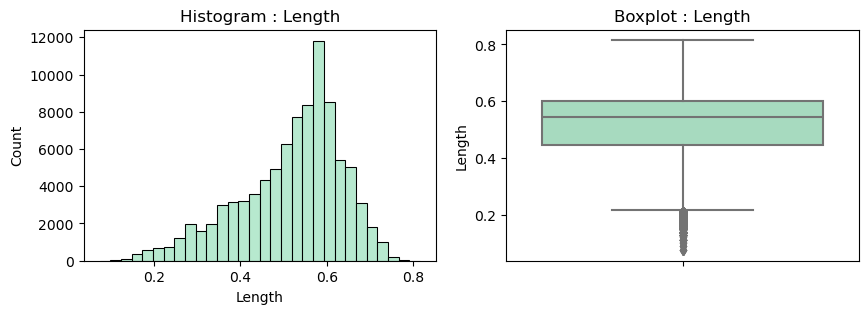

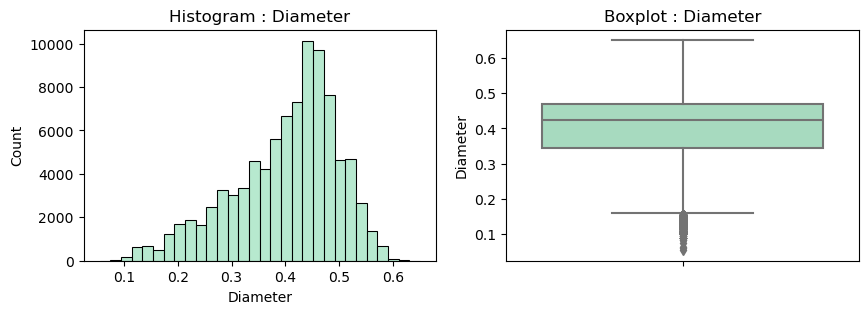

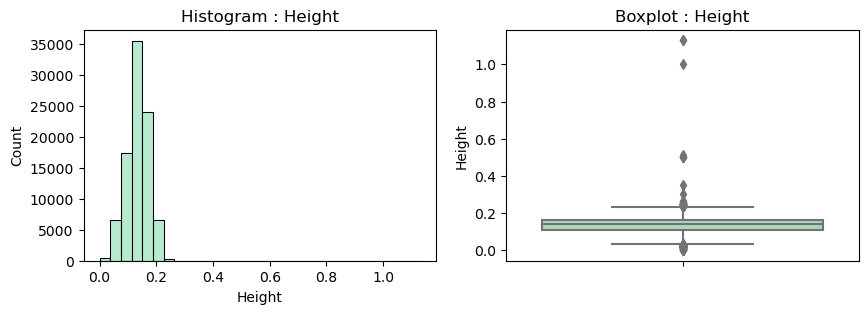

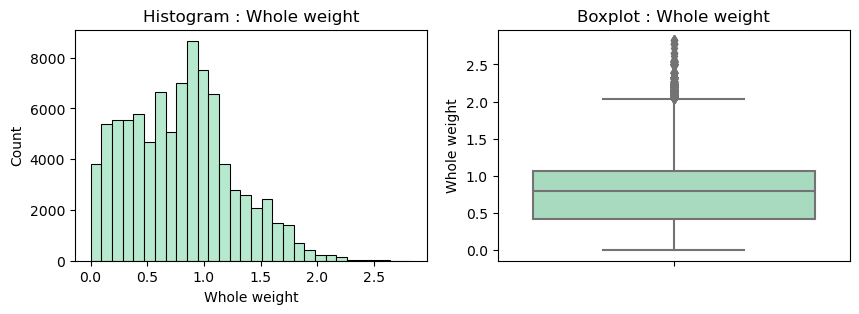

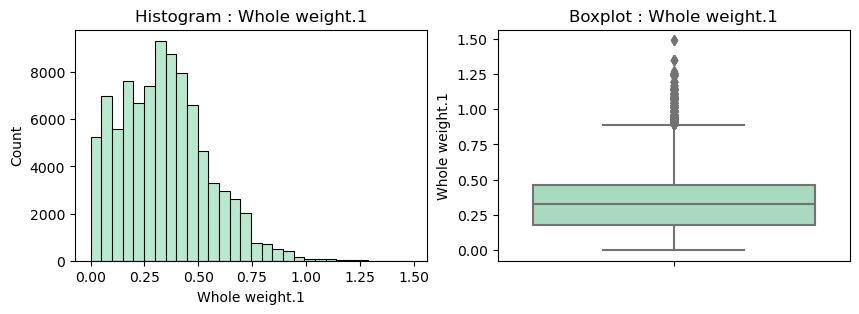

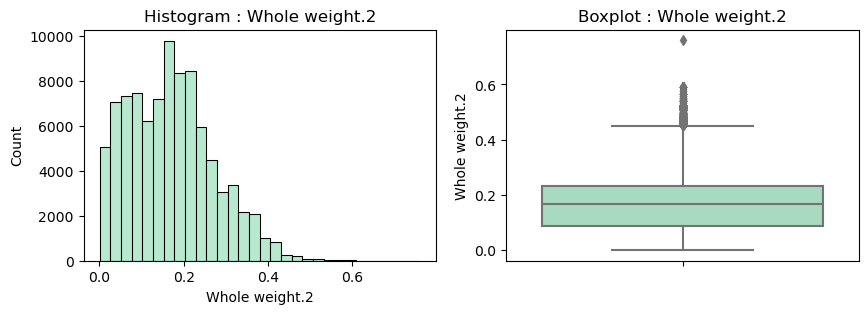

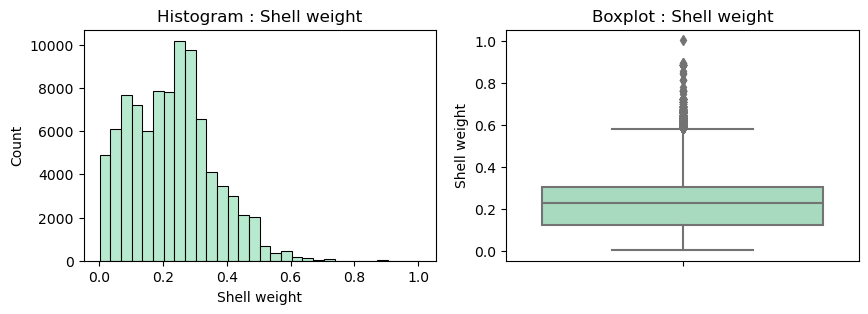

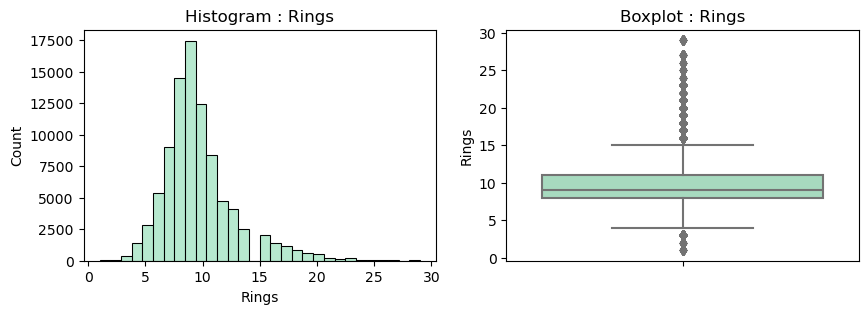

In [12]:
# Numerical Columns
def dist_check(df, columns):
    for c in columns:
        plt.figure(figsize = (10, 3))
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[c],
                     bins = 30,
                     color = "#9FE2BF")
        plt.title(f"Histogram : {c}")
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y = df[c],
                    color = "#9FE2BF")
        plt.title(f"Boxplot : {c}")
    
        plt.show()

dist_check(data, num)

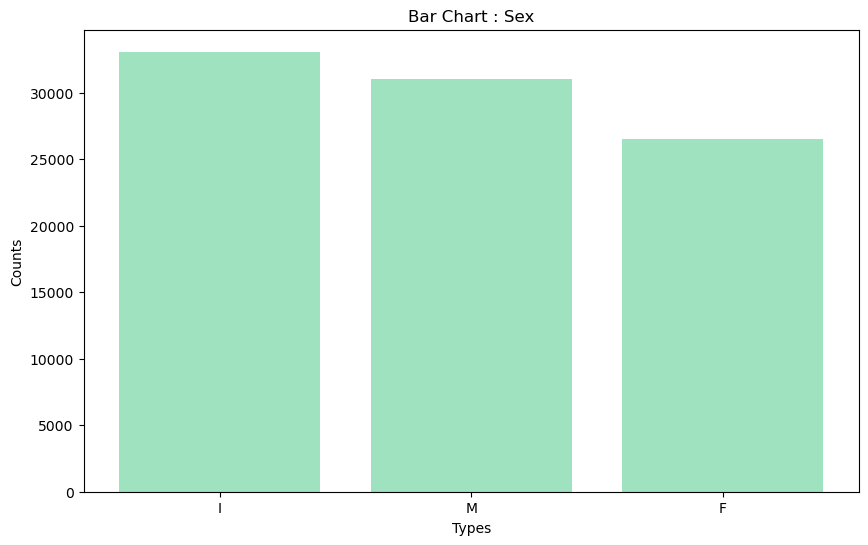

In [13]:
# Categorical Columns
def categorical_dist(df, columns):
    for c in columns:
        plt.figure(figsize = (10, 6))
    
        plt.bar(x = data[c].value_counts().index,
                height = data[c].value_counts().values,
                color = "#9FE2BF")
        plt.title(f"Bar Chart : {c}")
        plt.xlabel("Types")
        plt.ylabel("Counts")
        plt.xticks(data[c].value_counts().index)
    
        plt.show()

categorical_dist(data, cat)

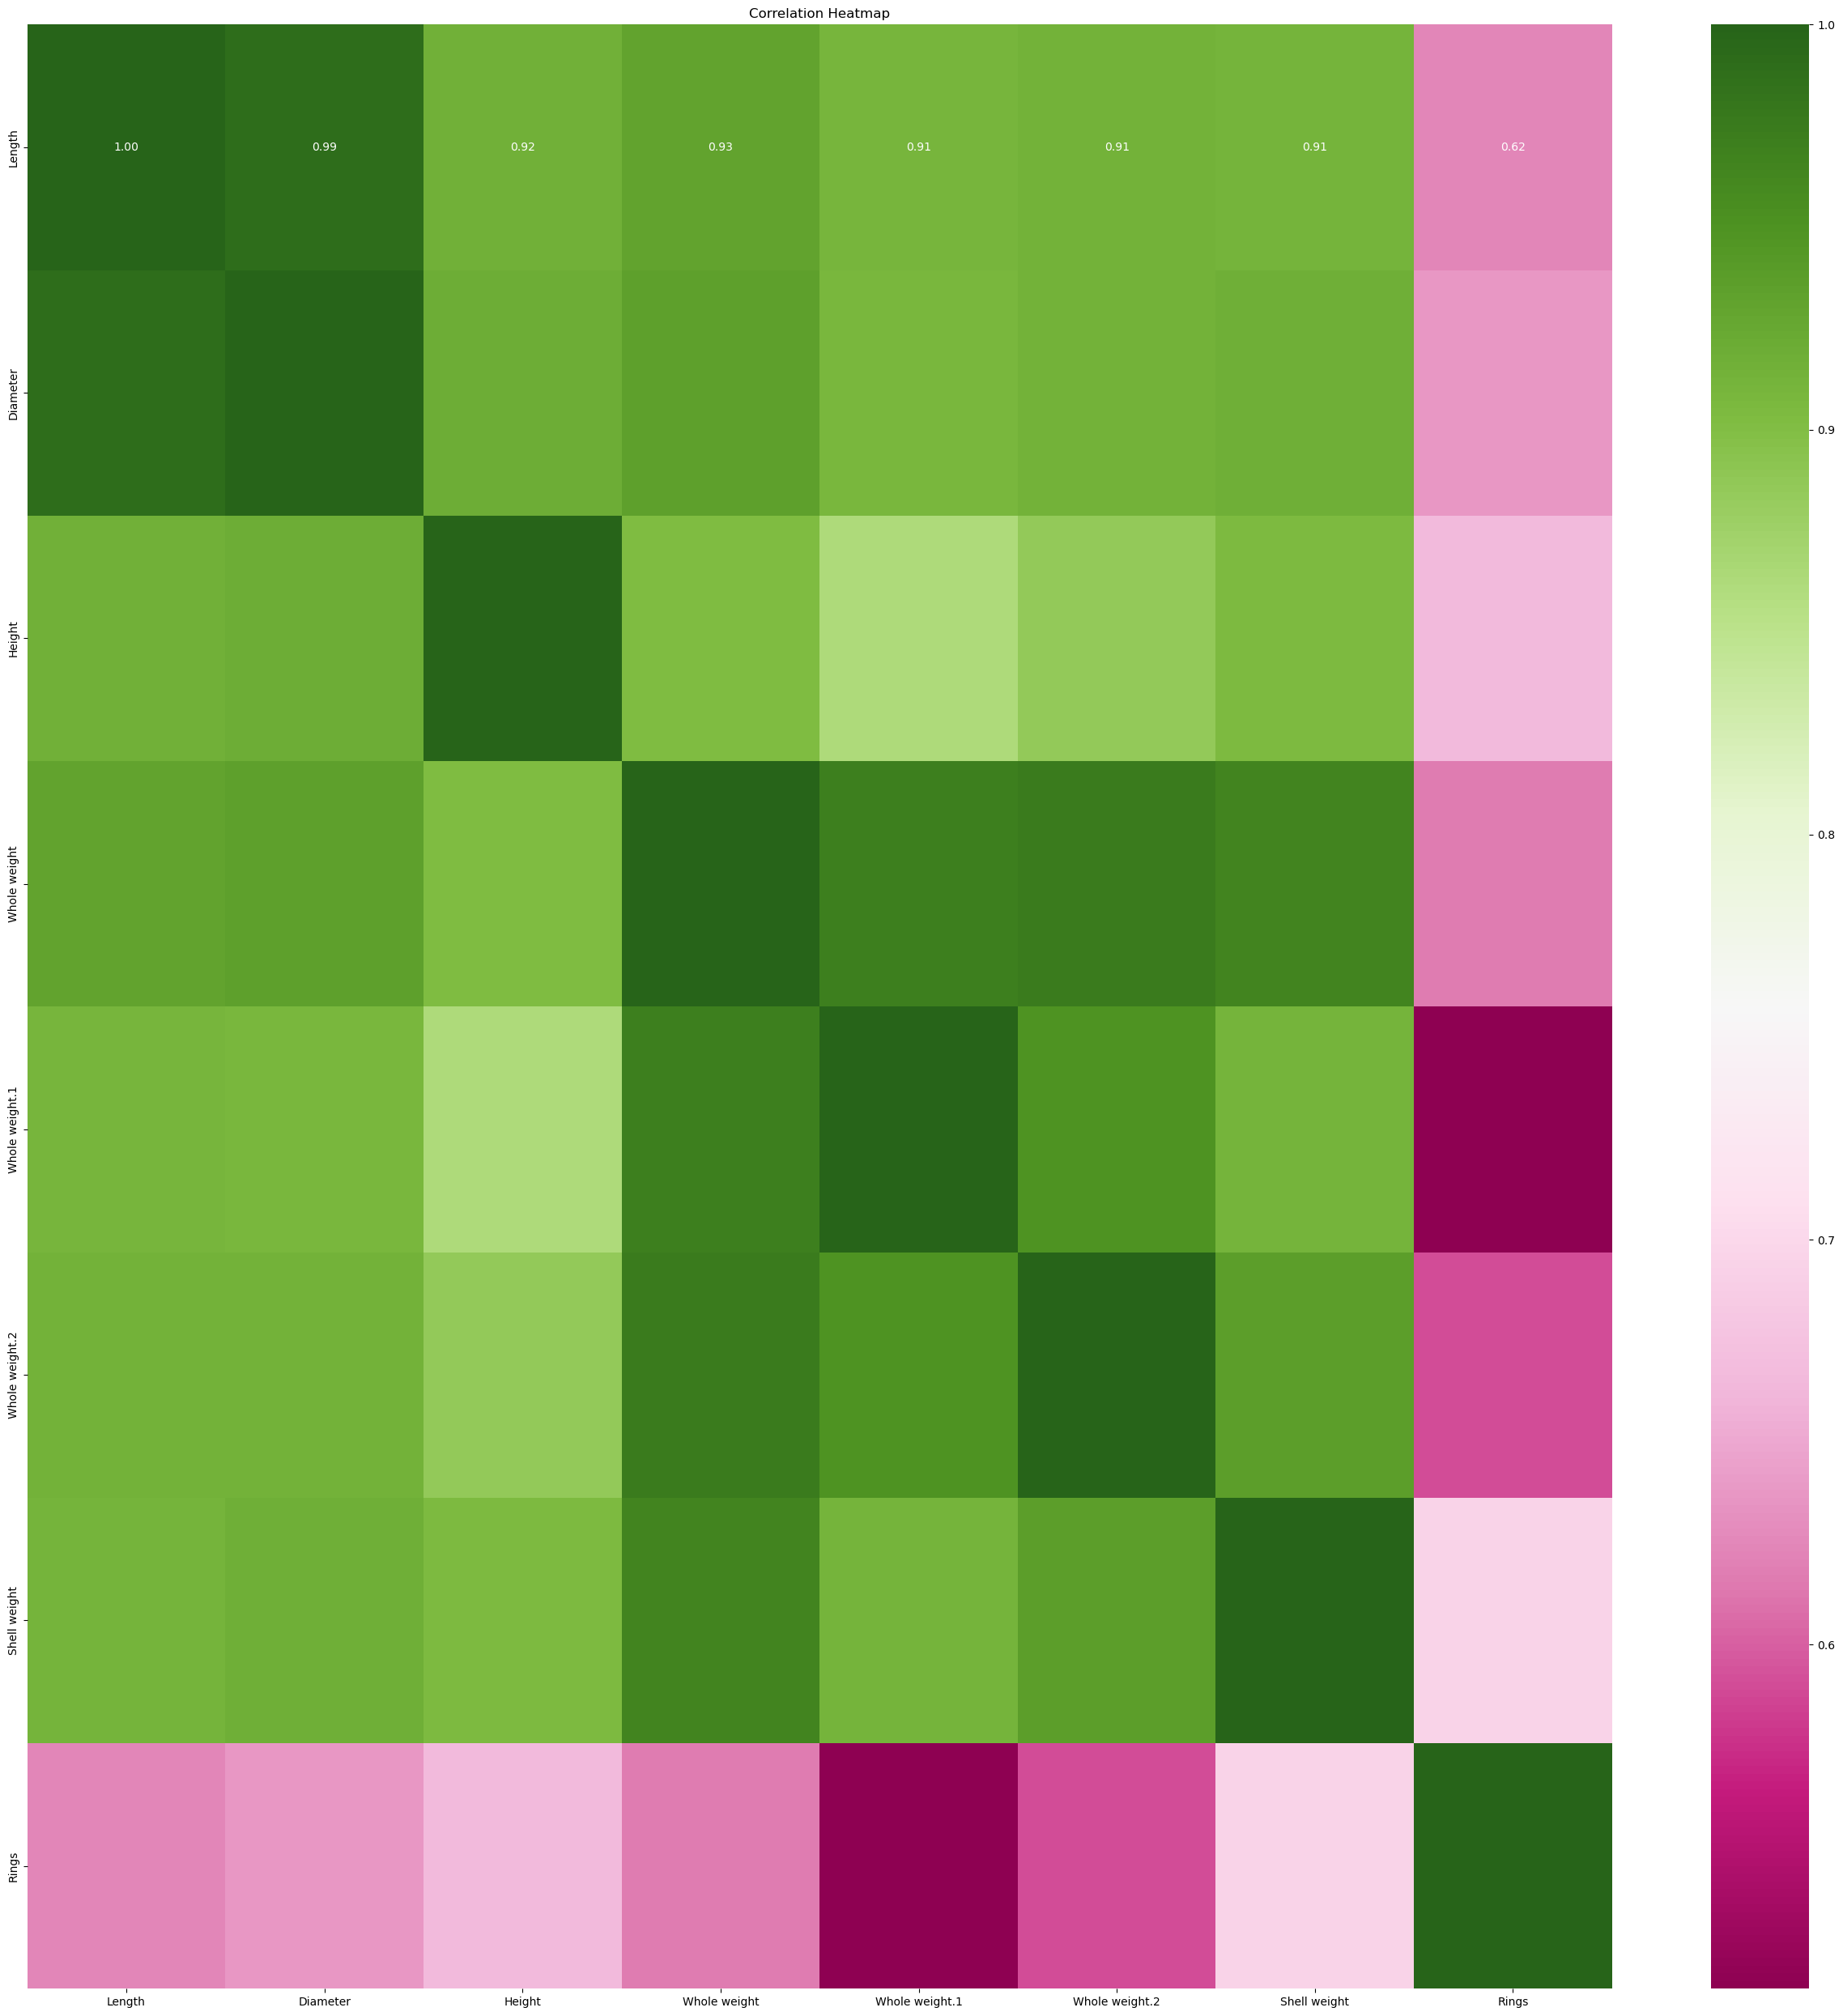

In [14]:
def heatmap(data):
    temp_data = data.select_dtypes(include = ["number"])
    plt.figure(figsize = (25, 25))
    sns.heatmap(temp_data.corr(),
                annot = True,
                cmap = "PiYG",
                fmt = ".2f",
                cbar = True)
    plt.title("Correlation Heatmap")
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

heatmap(data)

#### ENCODING

In [15]:
ohe_cols = ["Sex"]
ohe_enc = OneHotEncoder(sparse_output = False).set_output(transform = "pandas")
data = pd.concat([data, 
                  ohe_enc.fit_transform(data[ohe_cols]).astype('int')], axis = 1)
data = data.drop(columns = ohe_cols)
print("One Hot Encoding performed.")
data.info()

One Hot Encoding performed.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          90615 non-null  float64
 1   Diameter        90615 non-null  float64
 2   Height          90615 non-null  float64
 3   Whole weight    90615 non-null  float64
 4   Whole weight.1  90615 non-null  float64
 5   Whole weight.2  90615 non-null  float64
 6   Shell weight    90615 non-null  float64
 7   Rings           90615 non-null  int64  
 8   Sex_F           90615 non-null  int32  
 9   Sex_I           90615 non-null  int32  
 10  Sex_M           90615 non-null  int32  
dtypes: float64(7), int32(3), int64(1)
memory usage: 6.6 MB


In [16]:
check_unique_values(data)

Cardinality Check Result:


,column name,data type,unique values,values
0,Length,float64,157,"[0.55, 0.63, 0.16, 0.595, 0.555, 0.61, 0.415, ..."
1,Diameter,float64,126,"[0.43, 0.49, 0.11, 0.475, 0.425, 0.48, 0.325, ..."
2,Height,float64,90,"[0.15, 0.145, 0.025, 0.13, 0.17, 0.11, 0.04, 0..."
3,Whole weight,float64,3175,"[0.7715, 1.13, 0.021, 0.9145, 0.782, 1.201, 0...."
4,Whole weight.1,float64,1799,"[0.3285, 0.458, 0.0055, 0.3755, 0.3695, 0.5335..."
5,Whole weight.2,float64,979,"[0.1465, 0.2765, 0.003, 0.2055, 0.16, 0.3135, ..."
6,Shell weight,float64,1129,"[0.24, 0.32, 0.005, 0.25, 0.1975, 0.3085, 0.13..."
7,Rings,int64,28,"[11, 6, 10, 9, 4, 8, 15, 7, 12, 20, 17, 13, 14..."
8,Sex_F,int32,2,"[1, 0]"
9,Sex_I,int32,2,"[0, 1]"


#### DATA SPLITTING

In [17]:
x = data[data.columns.drop(["Rings"])]
y = data["Rings"]
num.remove("Rings")

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 11)

print("Data splitted.")

Data splitted.


#### SCALING

In [18]:
scaler = StandardScaler()
x_train[num] = scaler.fit_transform(x_train[num])
x_test[num] = scaler.transform(x_test[num])
print("Scaling performed.")

Scaling performed.


#### MODELLING

In [19]:
model = LinearRegression()
model = model.fit(x_train,
                  y_train)
model.coef_

array([-0.18458162,  0.77176236,  0.75433756,  1.79755386, -3.29503672,
       -0.69643515,  2.68502768,  0.24689388, -0.47198022,  0.22508634])

In [20]:
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [21]:
def evaluate_regression_results(y_true:np.array, y_pred:np.array):
    res_dict = {}
    res_dict['mae'] = mae(y_true,y_pred)
    res_dict['mse'] = mse(y_true,y_pred)
    res_dict['rmse'] = np.sqrt(res_dict['mse'])
    res_dict['r2'] = r2(y_true,y_pred)
    return res_dict

evaluate_regression_results(y_test, 
                            y_pred)

{'mae': 1.380718056898618,
 'mse': 4.0301470689513765,
 'rmse': 2.007522619785734,
 'r2': 0.6037823237150652}